# K-Mode Cluster Algorithm

---

## Import module

In [1]:
# Import module for data manipulation
import pandas as pd

# Import module for linear algebra
import numpy as np

# Import module for data visualization
from plotnine import *
import plotnine

# Data visualization with matplotlib
import matplotlib.pyplot as plt
# Use the theme of ggplot
plt.style.use('ggplot')
# Set the figure size of matplotlib
plt.figure(figsize = (10,4.8))

# Data visualization with seaborn
import seaborn as sns

# Import module for k-protoype cluster
from kmodes.kmodes import KModes

<Figure size 720x345.6 with 0 Axes>

In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

In [3]:
# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Import data

Data source: https://www.kaggle.com/ashydv/bank-customer-clustering-k-modes-clustering

In [4]:
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
print('Dimension data: {} rows and {} columns'.format(len(df), len(df.columns)))
df.head()

Dimension data: 7043 rows and 21 columns


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### Columns
Each row represents an employee; each column contains customer's attributes in Telecommunication company. The dataset have the following attributes or features or columns:
- **CustomerID**: Customer ID
- **Gender**: Whether the customer is a male or a female
- **SeniorCitizen**: Whether the customer is a senior citizen or not (1, 0)
- **Partner**: Whether the customer has a partner or not (Yes, No)
- **Dependents**: Whether the customer has dependents or not (Yes, No)
- **Tenure**: Number of months the customer has stayed with the company
- **PhoneService**: Whether the customer has a phone service or not (Yes, No)
- **MultipleLines**: Whether the customer has multiple lines or not (Yes, No, No phone service)
- **InternetService**: Customer’s internet service provider (DSL, Fiber optic, No)
- **OnlineSecurity**: Whether the customer has online security or not (Yes, No, No internet service)
- **OnlineBackup**: Whether the customer has online backup or not (Yes, No, No internet service)
- **DeviceProtection**: Whether the customer has device protection or not (Yes, No, No internet service)
- **TechSupport**: Whether the customer has tech support or not (Yes, No, No internet service)
- **StreamingTV**: Whether the customer has streaming TV or not (Yes, No, No internet service)
- **StreamingMovies**: Whether the customer has streaming movies or not (Yes, No, No internet service)
- **Contract**: The contract term of the customer (Month-to-month, One year, Two year)
- **PaperlessBilling**: Whether the customer has paperless billing or not (Yes, No)
- **PaymentMethod**: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- **MonthlyCharges**: The amount charged to the customer monthly
- **TotalCharges**: The total amount charged to the customer
- **Churn**: Whether the customer churned or not (Yes or No)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Replace the columns
df['SeniorCitizen'] = df['SeniorCitizen'].replace([0, 1], ['No', 'Yes'])

In [9]:
# Select the unique value each categorical columns
df.select_dtypes('object').nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
TotalCharges        6531
Churn                  2
dtype: int64

In [10]:
# Change the null value to the NaN
df = df.replace(r'^\s*$', np.nan, regex = True)

In [11]:
# Change the column type
df = df.astype({'TotalCharges': float})

In [12]:
# Select the unique value each categorical columns
df.select_dtypes('object').nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
Churn                  2
dtype: int64

In [13]:
# Summary statistics of numerical variable
for i in df.select_dtypes('object').columns:
    print(df[i].value_counts(),'\n')

0508-OOLTO    1
5201-CBWYG    1
8242-JSVBO    1
2346-DJQTB    1
9313-CDOGY    1
             ..
0727-IWKVK    1
4947-DSMXK    1
1587-FKLZB    1
2080-CAZNM    1
5906-DVAPM    1
Name: customerID, Length: 7043, dtype: int64 

Male      3555
Female    3488
Name: gender, dtype: int64 

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64 

No     3641
Yes    3402
Name: Partner, dtype: int64 

No     4933
Yes    2110
Name: Dependents, dtype: int64 

Yes    6361
No      682
Name: PhoneService, dtype: int64 

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64 

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64 

No                     3095
Yes        

In [14]:
# Select the categorical columns
cols = df.select_dtypes('object').columns
df_cat = df[cols]

In [15]:
# Show the data
df_cat.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [16]:
# Check missing value
df_cat.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Churn               0
dtype: int64

## Explanatory data analysis

#### The composition of churn

In [17]:
df_churn = pd.DataFrame(df_cat['Churn'].value_counts()).reset_index()
df_churn['Percentage'] = df_churn['Churn'] / df['Churn'].value_counts().sum()
df_churn.rename(columns = {'index':'Churn', 'Churn':'Total'}, inplace = True)
df_churn = df_churn.sort_values('Total', ascending = True).reset_index(drop = True)
df_churn

,Churn,Total,Percentage
0,Yes,1869,0.265
1,No,5174,0.735


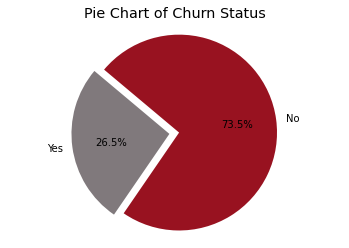

In [18]:
# Customize colors and other settings
colors = ['#80797c', '#981220']
explode = (0.1,0) # Explode 1st slice
# Create a pie chart
plt.pie(df_churn['Total'], explode = explode, labels = df_churn['Churn'], 
        colors = colors, autopct = '%1.1f%%', shadow = False, startangle = 140)
# Add title
plt.title('Pie Chart of Churn Status')
plt.axis('equal')
plt.show()

#### The composition of churn by payment method

In [19]:
df_churn_payment = df.groupby(['Churn', 'PaymentMethod']).agg({
    'customerID': 'count'
    }
).rename(columns = {'customerID': 'Total'}).reset_index().sort_values('Total', ascending = False)

In [20]:
# Replace the categories
df_churn_payment = df_churn_payment.replace(['Bank transfer (automatic)', 'Credit card (automatic)'], 
                                            ['Bank transfer', 'Credit card'])

In [21]:
df_churn_payment

,Churn,PaymentMethod,Total
3,No,Mailed check,1304
2,No,Electronic check,1294
1,No,Credit card,1290
0,No,Bank transfer,1286
6,Yes,Electronic check,1071
7,Yes,Mailed check,308
4,Yes,Bank transfer,258
5,Yes,Credit card,232


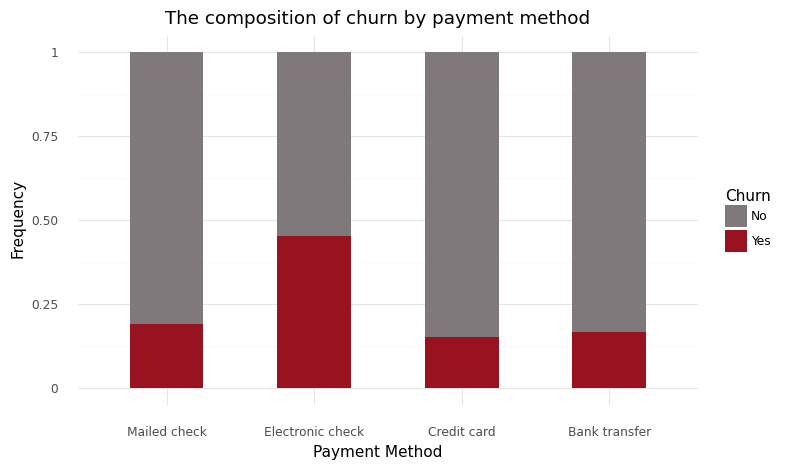

<ggplot: (150589190641)>

In [22]:
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_churn_payment)+
    geom_bar(aes(x = 'PaymentMethod',
                 y = 'Total',
                 fill = 'Churn',
                 width = 0.5),
             stat = 'identity',
             position = 'fill')+
    labs(title = 'The composition of churn by payment method',
         subtitle = 'Telco Churn Data')+
    xlab('Payment Method')+
    ylab('Frequency')+
    scale_x_discrete(limits = ['Mailed check', 'Electronic check', 'Credit card', 'Bank transfer'])+
    scale_fill_manual(values = ['#80797c','#981220'], labels = ['No', 'Yes'])+
    theme_minimal()
)

#### The composition of churn by payment contract

In [23]:
df_churn_contract = df.groupby(['Churn', 'Contract']).agg({
    'customerID': 'count'
    }
).rename(columns = {'customerID': 'Total'}).reset_index().sort_values('Total', ascending = False)

In [24]:
df_churn_contract

,Churn,Contract,Total
0,No,Month-to-month,2220
3,Yes,Month-to-month,1655
2,No,Two year,1647
1,No,One year,1307
4,Yes,One year,166
5,Yes,Two year,48


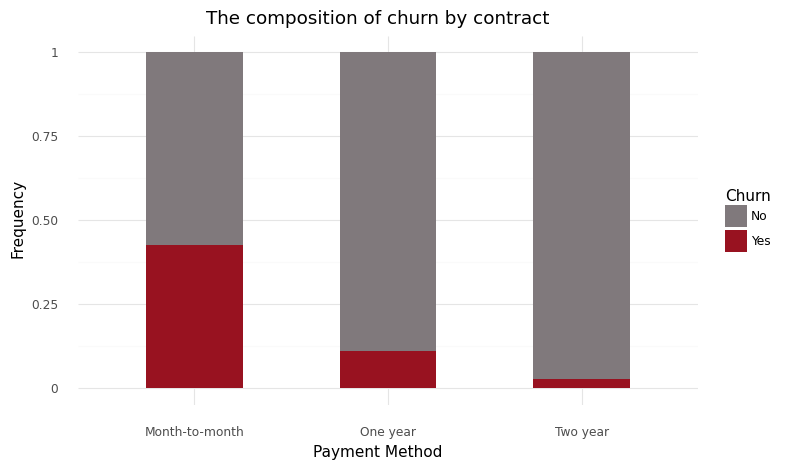

<ggplot: (150589191590)>

In [25]:
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_churn_contract)+
    geom_bar(aes(x = 'Contract',
                 y = 'Total',
                 fill = 'Churn',
                 width = 0.5),
             stat = 'identity',
             position = 'fill')+
    labs(title = 'The composition of churn by contract',
         subtitle = 'Telco Churn Data')+
    xlab('Payment Method')+
    ylab('Frequency')+
    scale_x_discrete(limits = ['Month-to-month', 'One year', 'Two year'])+
    scale_fill_manual(values = ['#80797c','#981220'], labels = ['No', 'Yes'])+
    theme_minimal()
)

## Data pre-processing

#### Remove unused columns for the next analysis `customerID`

In [26]:
#del df_cat['customerID']

In [27]:
#print('Dimension data: {} rows and {} columns'.format(len(df_cat), len(df_cat.columns)))
#df_cat.head()

## Cluster analysis

Thanks to https://github.com/aryancodify/Clustering

In [28]:
# Convert the dataframe into matrix
dfMatrix = df_cat.loc[:, df_cat.columns != 'customerID'].to_numpy()

In [29]:
dfMatrix

array([['Female', 'No', 'Yes', ..., 'Yes', 'Electronic check', 'No'],
       ['Male', 'No', 'No', ..., 'No', 'Mailed check', 'No'],
       ['Male', 'No', 'No', ..., 'Yes', 'Mailed check', 'Yes'],
       ...,
       ['Female', 'No', 'Yes', ..., 'Yes', 'Electronic check', 'No'],
       ['Male', 'Yes', 'Yes', ..., 'Yes', 'Mailed check', 'Yes'],
       ['Male', 'No', 'No', ..., 'Yes', 'Bank transfer (automatic)',
        'No']], dtype=object)

Error of initialization: https://github.com/nicodv/kmodes/blob/master/README.rst#faq

In [30]:
# Choosing optimal K
cost = []
for cluster in range(1, 10):
    try:
        kmodes = KModes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kmodes.fit_predict(dfMatrix)
        cost.append(kmodes.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break

Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


In [31]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster': range(1, 10), 'Cost': cost})
df_cost

,Cluster,Cost
0,1,54520.000
1,2,45026.000
2,3,34507.000
3,4,33157.000
4,5,31005.000
5,6,29833.000
6,7,29623.000
7,8,28234.000
8,9,28001.000


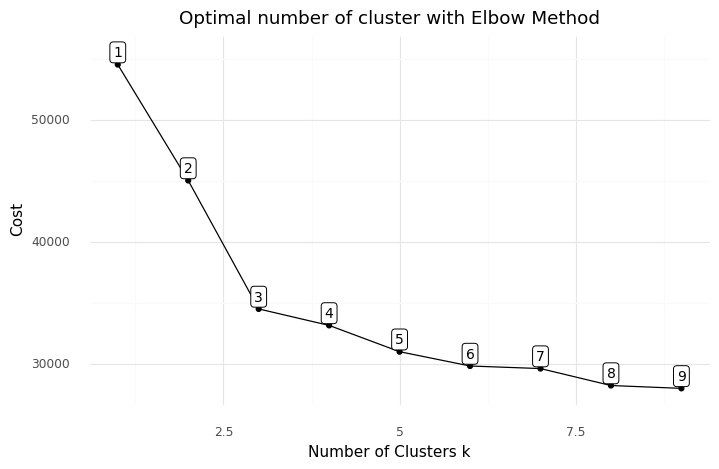

<ggplot: (150589228192)>

In [32]:
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [33]:
# Fit the cluster
kmodes = KModes(n_jobs = -1, n_clusters = 3, init = 'Huang', random_state = 0)
kmodes.fit_predict(dfMatrix)

array([1, 1, 1, ..., 1, 1, 2], dtype=uint16)

In [34]:
# Cluster centorid
kmodes.cluster_centroids_

array([['Male', 'No', 'No', 'No', 'Yes', 'No', 'No',
        'No internet service', 'No internet service',
        'No internet service', 'No internet service',
        'No internet service', 'No internet service', 'Two year', 'No',
        'Mailed check', 'No'],
       ['Male', 'No', 'No', 'No', 'Yes', 'No', 'Fiber optic', 'No', 'No',
        'No', 'No', 'No', 'No', 'Month-to-month', 'Yes',
        'Electronic check', 'No'],
       ['Female', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Fiber optic', 'No',
        'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Two year', 'Yes',
        'Electronic check', 'No']], dtype='<U19')

In [35]:
# Check the iteration of the clusters created
kmodes.n_iter_

3

In [36]:
# Check the cost of the clusters created
kmodes.cost_

34507.0

In [37]:
# Add the cluster to the dataframe
df_cat['Cluster Labels'] = kmodes.labels_
df_cat['Segment'] = df_cat['Cluster Labels'].map({0:'First', 1:'Second', 2:'Third'})

<ipython-input-37-08d1f047d227>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-37-08d1f047d227>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [38]:
# Order the cluster
df_cat['Segment'] = df_cat['Segment'].astype('category')
df_cat['Segment'] = df_cat['Segment'].cat.reorder_categories(['First', 'Second', 'Third'])

<ipython-input-38-1ca94e148e49>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-38-1ca94e148e49>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [39]:
df_cat.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,Cluster Labels,Segment
0,7590-VHVEG,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,1,Second
1,5575-GNVDE,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,1,Second
2,3668-QPYBK,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,1,Second
3,7795-CFOCW,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,1,Second
4,9237-HQITU,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,1,Second


In [40]:
df_cat.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn', 'Cluster Labels', 'Segment'],
      dtype='object')

In [41]:
# Columns for centroids
list_col = ['customerID', 'Cluster Labels', 'Segment']
cols = [col for col in df_cat if col not in list_col]
cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [42]:
index = ['First Cluster', 'Second Cluster', 'Third Cluster']

In [43]:
pd.DataFrame(kmodes.cluster_centroids_, columns = cols, index = index)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
First Cluster,Male,No,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,No
Second Cluster,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
Third Cluster,Female,No,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,No
